In [5]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
data = yf.download("AAPL",start="2020-01-01",end="2024-01-01")
data.head()

C:\Users\yathi\AppData\Local\Temp\ipykernel_17392\3142971102.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL",start="2020-01-01",end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763710,72.523738,71.539322,71.696152,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995346,72.600952,71.775781,72.345197,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [7]:
series = data['Close']

<Figure size 1000x400 with 0 Axes>

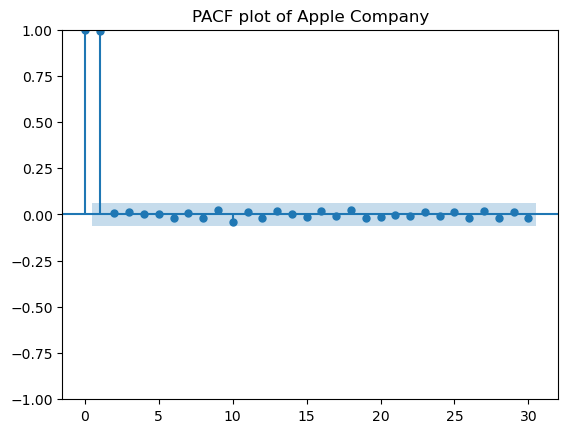

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize=(10,4))
plot_pacf(series,lags=30)
plt.title("PACF plot of Apple Company")
plt.show()

In [9]:
# AR(p=1)

In [10]:
model = AutoReg(series,lags=1)
result = model.fit()

print("Estimated Parameters",result.params)

Estimated Parameters const      0.628970
AAPL.L1    0.996296
dtype: float64


C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
forecast = result.predict(start=len(series),end=len(series)+9)

print("Forecast for next 10 days is :")
print(forecast)

Forecast for next 10 days is :
1006    190.651262
1007    190.574036
1008    190.497096
1009    190.420441
1010    190.344070
1011    190.267981
1012    190.192175
1013    190.116649
1014    190.041404
1015    189.966436
dtype: float64


C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [12]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600
2023-12-26,191.243927,192.076065,191.025984,191.798686,28919300
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900
2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100


In [13]:
Actual = yf.download("AAPL",start="2024-01-01",end="2024-10-01")
Actual.head()

C:\Users\yathi\AppData\Local\Temp\ipykernel_17392\1020280746.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Actual = yf.download("AAPL",start="2024-01-01",end="2024-10-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,183.903229,186.677036,182.169601,185.399096,82488700
2024-01-03,182.526230,184.140985,181.713894,182.496512,58414500
2024-01-04,180.208145,181.377098,179.187783,180.445890,71983600
2024-01-05,179.484970,181.050190,178.484425,180.287405,62379700
2024-01-08,183.823990,183.863624,179.801976,180.386452,59144500


In [14]:
# Data PreProcessing : Stationary Data >> Smoothening the data (Removing trend & Seasonality)

In [15]:
# Moving Average (q)
# ARIMA (p,d,q) == MA(0,0,1)

In [16]:
data = yf.download("NVDA",start='2025-10-01',end='2025-11-16')
series = data['Close']

C:\Users\yathi\AppData\Local\Temp\ipykernel_17392\640489358.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("NVDA",start='2025-10-01',end='2025-11-16')
[*********************100%***********************]  1 of 1 completed


In [17]:
data.shape
# acf plot

(33, 5)

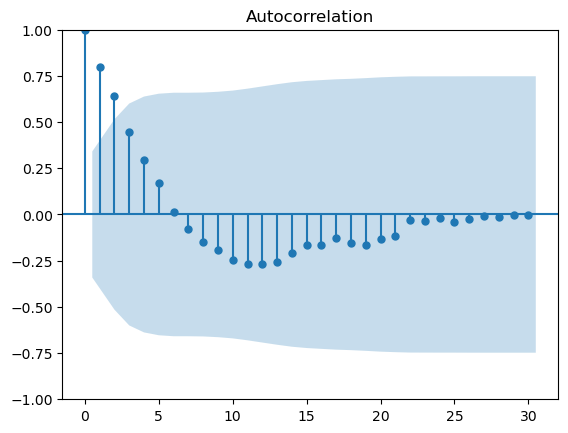

<Figure size 1000x400 with 0 Axes>

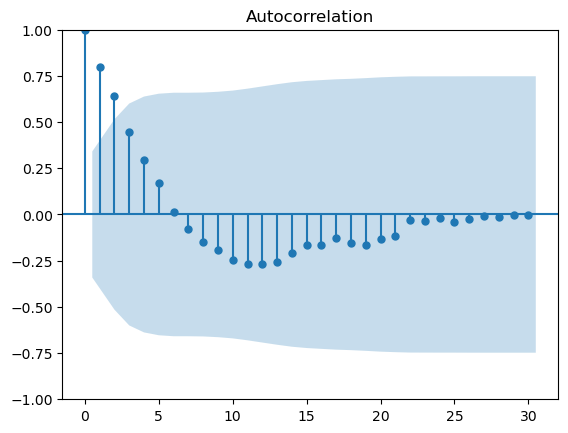

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize=(10,4))
plot_acf(series,lags=30)

# Q value determined is

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series,order=(0,0,1))
result = model.fit()

C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [20]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                   33
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -104.811
Date:                Mon, 22 Dec 2025   AIC                            215.622
Time:                        16:51:57   BIC                            220.111
Sample:                    10-01-2025   HQIC                           217.132
                         - 11-14-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.0314      2.089     90.950      0.000     185.936     194.127
ma.L1          0.6482      0.184      3.518      0.000       0.287       1.009
sigma2        33.0418      9.940      3.324      0.0

In [21]:
forecast = result.forecast(steps=10)
print("Next 10 days forecast")
print(forecast)

Next 10 days forecast
2025-11-17    192.868460
2025-11-18    190.031403
2025-11-19    190.031403
2025-11-20    190.031403
2025-11-21    190.031403
2025-11-24    190.031403
2025-11-25    190.031403
2025-11-26    190.031403
2025-11-27    190.031403
2025-11-28    190.031403
Freq: B, Name: predicted_mean, dtype: float64


In [22]:
# ARMA: Auto regression with Moving Average
# ARIMA(p,d,q) =  ARMA(1,0,1)

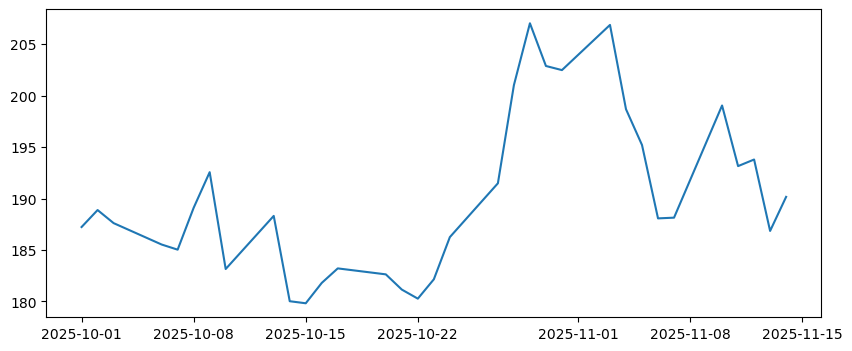

In [23]:
plt.figure(figsize=(10,4))
plt.plot(series)

In [24]:
model = ARIMA(series,order=(2,0,2))
result = model.fit()

C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\yathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [25]:
fitted = result.fittedvalues

forecast = result.forecast(steps=10)

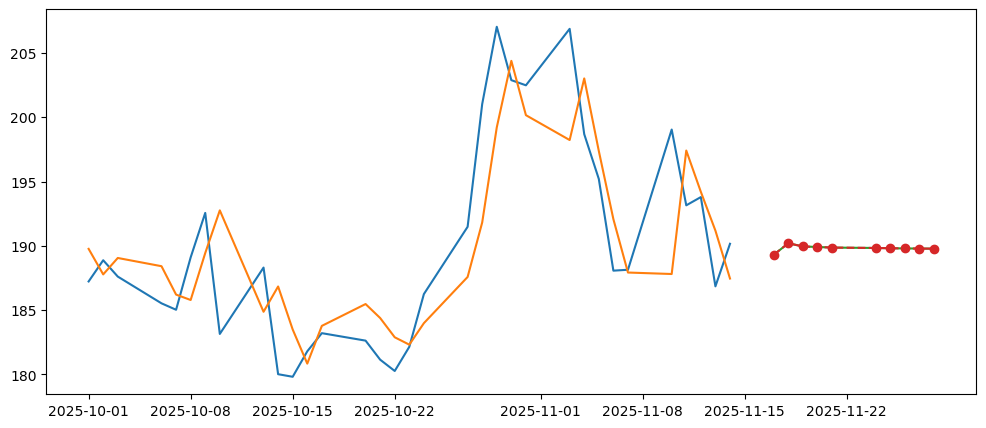

In [26]:
plt.figure(figsize=(12,5))
plt.plot(series,label='orignal')
plt.plot(fitted,label='Fitted')
plt.plot(forecast,label='Forecast')
plt.plot(forecast.index,forecast.values,linestyle="--",marker='o')